In [248]:
#Importing libraries
import pandas as pd
import seaborn as sns
import plotly.express as px

In [249]:
#Reading dataset and showing informations resume
sleep_df = pd.read_excel('sleep_healty.xlsx')
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [250]:
#Cleaninng the dataset
sleep_df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [251]:
#Filling NaN's with zero
sleep_df.fillna(0, inplace = True)

In [252]:
#Checking
sleep_df.isna().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [253]:
#Checking
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


<Axes: >

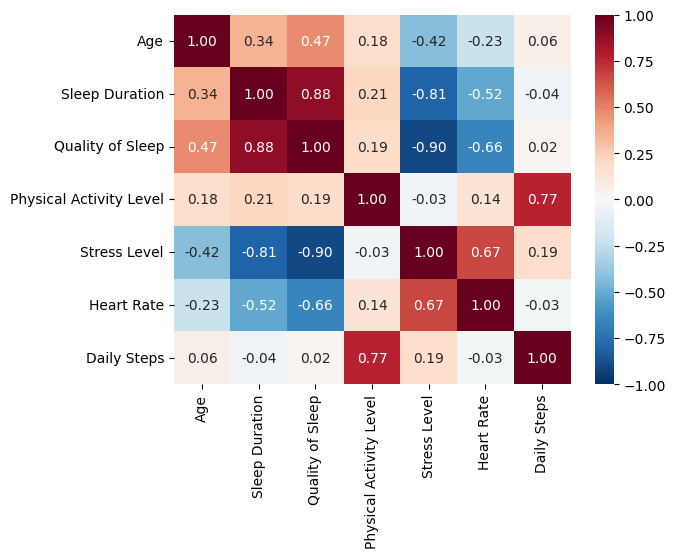

In [254]:
#Checking correlation among columns

#Selecting numerical variables
sleep_number = sleep_df[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']]

#Using Pearson's correlation 
correlation = sleep_number.corr()
sns.heatmap(correlation, annot = True, fmt = '.2f', vmax = +1, vmin = -1, cmap = "RdBu_r")


In [255]:
initial_sleep_quality = sleep_df['Quality of Sleep'].mean()
print(f'{initial_sleep_quality:.3f}')

7.313


In [256]:
graphic = px.density_heatmap(sleep_df, x = 'Stress Level', y = 'Quality of Sleep', color_continuous_scale = 'teal')
graphic.show()

In [257]:
graphic = px.density_heatmap(sleep_df, x = 'Heart Rate', y = 'Quality of Sleep', color_continuous_scale = 'teal')
graphic.show()

In [258]:
graphic = px.density_heatmap(sleep_df, x = 'Sleep Duration', y = 'Quality of Sleep', color_continuous_scale = 'teal')
graphic.show()

In [259]:
graphic = px.histogram(sleep_df, x = 'BMI Category', color = 'Quality of Sleep' )
graphic.show()

In [260]:
graphic = px.histogram(sleep_df, x = 'Gender', color = 'Quality of Sleep' )
graphic.show()

In [261]:
graphic = px.histogram(sleep_df, x = 'Occupation', color = 'Quality of Sleep' )
graphic.show()

In [262]:
graphic = px.histogram(sleep_df, x = 'Blood Pressure', color = 'Quality of Sleep' )
graphic.show()

In [263]:
graphic = px.histogram(sleep_df, x = 'Sleep Disorder', color = 'Quality of Sleep' )
graphic.show()

In [264]:
variable_not_numerical_df = sleep_df[['BMI Category', 'Gender', 'Occupation', 'Blood Pressure', 'Sleep Disorder']]

for variable in variable_not_numerical_df.columns:
    variable_not_numerical = sleep_df.groupby(variable)['Quality of Sleep'].mean().sort_values(ascending = False)
    print(variable_not_numerical)



BMI Category
Normal           7.661538
Normal Weight    7.428571
Overweight       6.898649
Obese            6.400000
Name: Quality of Sleep, dtype: float64
Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64
Occupation
Engineer                8.412698
Lawyer                  7.893617
Accountant              7.891892
Nurse                   7.369863
Manager                 7.000000
Teacher                 6.975000
Doctor                  6.647887
Software Engineer       6.500000
Salesperson             6.000000
Scientist               5.000000
Sales Representative    4.000000
Name: Quality of Sleep, dtype: float64
Blood Pressure
118/75    9.000000
139/91    9.000000
115/78    9.000000
115/75    8.000000
118/76    8.000000
119/77    8.000000
121/79    8.000000
122/80    8.000000
125/80    7.661538
140/95    7.523077
130/85    7.242424
120/80    7.022222
135/90    7.000000
135/88    7.000000
128/84    7.000000
125/82    7.000000
117/76    7.000000
142/92   

In [265]:
sleep_df = sleep_df[(sleep_df['Heart Rate'] <= 71) & (sleep_df['Stress Level'] <= 6) & (sleep_df['Sleep Duration'] >= 7)]
new_sleep_quality = sleep_df['Quality of Sleep'].mean()
print(f'{new_sleep_quality:.3f}')

8.171
